In [3]:
from smote_main import smote_validate_synth
from data_help.data_help import *
from SMOTE.smote import *
from mlp.mlp import *
from data_help.stratcv import *
from scipy.stats import ttest_ind

## UCI Data
### flare

In [2]:
dataset_name = 'flare'
T = dataset_load(dataset_name)
T1, T2 = split_by_label(T)
mu = 0.1
beta = 10
h = 7

In [3]:
# standard MLP
mlp_base = MLP(T1.shape[1], h, 0.5, np.tanh, mu, beta)
base_acc = kfold_cv(mlp_base, T, k=5)

[[358.99585009]]
[[464.69360422]]
[[1113.42961014]]
[[352.94667048]]
[[618.7226847]]
[[775.60740884]]
[[440.88876708]]
[[912.57981059]]
[[406.69938077]]
[[759.47035303]]
[[388.5345698]]
[[1416.45911604]]
[[389.90427368]]
[[1502.78430554]]
[[403.07283962]]
[[1316.81882216]]
[[375.7189147]]
[[741.40675668]]
[[356.72485288]]
[[379.51400434]]
[[303.75963722]]
[[319.29758963]]
[[310.86058221]]
[[311.59912125]]
[[307.51357932]]
[[306.59944592]]
[[329.14721774]]
[[315.47980271]]
[[361.39582545]]
[[550.28447834]]
[[330.08121371]]
[[304.44989218]]
[[338.1364084]]
[[376.71496001]]
[[315.35767051]]
[[324.13308318]]
[[311.37967792]]
[[311.52207424]]
[[309.73722374]]
[[306.53870136]]
[[305.45527223]]
[[410.84420683]]
[[1243.08302458]]
[[864.98125302]]
[[468.95509894]]
[[437.29354102]]
[[520.93858032]]
[[1548.34754113]]
[[503.8043277]]
[[1416.22519674]]
[[582.64492608]]
[[886.41337171]]
[[422.61216387]]
[[645.78204476]]
[[714.0720645]]
[[431.13045459]]
[[370.33068887]]
[[374.12102919]]
[[405.4340055

In [14]:
# Smote
# Sample to give equal class balances
T_smote = T.copy()
T2_smote = SMOTE(T2, int(len(T1)/len(T2)) * 100, k=5)
for ex in T2_smote:
    ex.append(-1)
    ex.insert(0, 1) # add arbitrary index valiue
T2_smote = np.array(T2_smote)
T_smote = np.vstack((T_smote, T2_smote))

In [5]:
smote_mlp = MLP(T1.shape[1], 3, 0.5, np.tanh, mu, beta)
# K-Fold CV for the classifier on smote dataset
smote_acc  = kfold_cv(smote_mlp, T_smote, k=5, test=T)

[[456.94821872]]
[[378.40099365]]
[[372.36283055]]
[[373.86139005]]
[[371.0754836]]
[[373.1170105]]
[[371.22965379]]
[[371.91025445]]
[[371.95882889]]
[[371.56455517]]
[[371.16566078]]
[[371.2116422]]
[[370.95539659]]
[[371.39669237]]
[[371.30657071]]
[[371.24472617]]
[[371.1301694]]
[[371.4620551]]
[[371.07084666]]
[[371.18817402]]
[[371.06077708]]
[[371.46645995]]
[[371.09031406]]
[[370.95971443]]
[[371.3826681]]
[[371.19668179]]
[[371.22989423]]
[[371.38912749]]
[[371.40332863]]
[[371.38479461]]
[[371.33878168]]
[[371.2604357]]
[[373.02615623]]
[[371.79582971]]
[[371.37523666]]
[[371.82474095]]
[[370.12571929]]
[[369.88295995]]
[[368.78326981]]
[[373.66530694]]
[[372.18717462]]
[[370.86986664]]
[[374.43818317]]
[[370.61799758]]
[[370.43649515]]
[[370.43515733]]
[[370.43499165]]
[[370.43496927]]
Final loss= [[370.43496927]]
[1.0, 0.0, 0.5, 0.8135349172066235, 0.5, 0.0]
[[701.63067126]]
[[381.4556118]]
[[369.31335422]]
[[369.90973607]]
[[369.83189706]]
[[369.86498872]]
[[369.80890376]

[[1112.15582824]]
[[2090.84575011]]
[[1919.09662412]]
[[2008.16142103]]
[[2164.68309666]]
[[2098.05615894]]
[[2029.217986]]
[[2020.90323789]]
[[2108.79303764]]
[[2102.65679319]]
[[2100.094819]]
[[1624.14157524]]
[[2088.24466256]]
[[1751.76251854]]
[[1855.35909661]]
[[1851.69361282]]
[[1851.54065405]]
[[2211.63314488]]
[[2099.52674544]]
[[2067.68431163]]
[[2151.99992477]]
[[2117.98857343]]
[[2070.00000053]]
[[2165.99999402]]
[[2238.80715668]]
[[2194.00179589]]
[[2162.]]
[[2162.]]
Final loss= [[2162.]]
Re-optimizing from loss at 1751.763
[[1730.68216474]]
[[1914.82137115]]
[[1955.57713512]]
[[1970.44098704]]
[[1972.78948697]]
[[1973.57283551]]
[[1972.98927979]]
[[1901.78457105]]
[[1902.05323909]]
[[1900.8316414]]
[[1879.93041578]]
[[1879.96918917]]
[[1921.47708499]]
[[1875.92417194]]
[[1662.39171706]]
[[1815.27505381]]
[[1666.46276342]]
[[1659.87486985]]
[[1701.56177104]]
[[2064.99418851]]
[[1816.13403757]]
[[2110.39038434]]
[[2072.76553294]]
[[2108.23078006]]
[[2085.47918021]]
[[2085.38

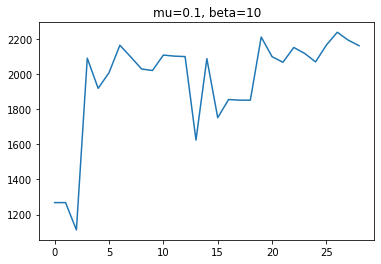

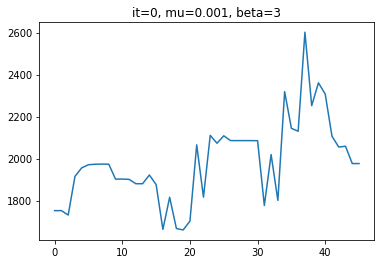

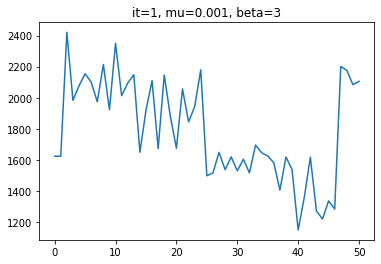

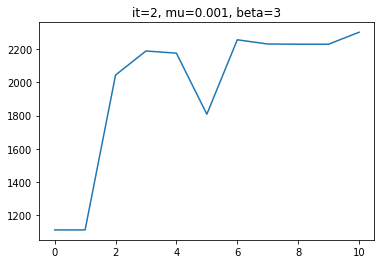

In [6]:
# A single training run on the smote dataset
smote_mlp1 = MLP(T1.shape[1], h, 0.5, np.tanh, mu, beta, repeat=True)
single_T2smote = [ex[1:-1] for ex in T2_smote]
smote_mlp1.train(T1, single_T2smote)
single_run_smote1 = eval_mlp(smote_mlp1, T, T1, T2)
print(single_run_smote1)

[1119.14050075]][[1090.19686153]][[1015.75148478]][[1056.75232765]][[974.66208582]][[1173.41285447]][[1175.102613]][[1184.0675087]][[1044.89888569]][[947.64270144]][[1124.32454135]][[1068.98919485]][[1038.53189855]][[1048.04885452]][[1078.16929394]][[1084.1879508]][[1016.97141192]][[1007.23780733]][[1005.85383431]][[1038.1394169]][[1046.45277395]][[965.49054187]][[1027.75611778]][[1030.44749317]][[1036.97843439]][[1029.41286854]][[1064.59559864]][[1007.1027637]][[1039.96840942]][[1054.96672246]][[1071.86063167]][[1045.50718528]][[1011.54826542]][[1022.51376402]][[1007.59374967]][[1010.74985215]][[1035.43125381]][[966.64277071]][[1006.43575311]][[1045.43168308]][[1066.12814621]][[1130.49472116]][[1078.51034228]][[1075.81388022]][[1036.38019712]][[999.31893783]][[1016.66385863]][[1013.35862647]][[1007.95209473]][[1018.36290045]][[1041.09835151]][[1085.20157706]][[1023.10461875]][[1079.12342435]][[1085.8645979]][[1084.96201431]][[1070.92228977]][[1031.23566903]][[1077.65408324]][[1045.638

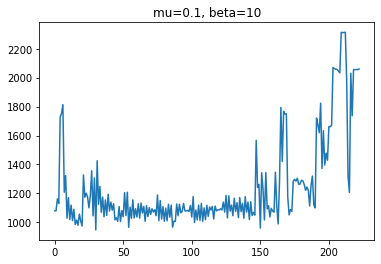

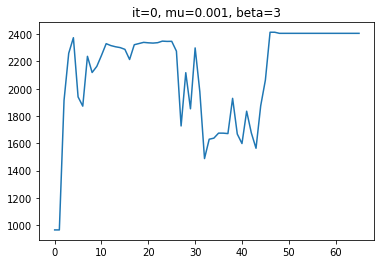

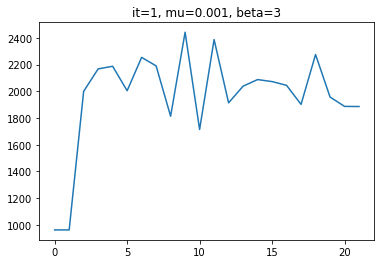

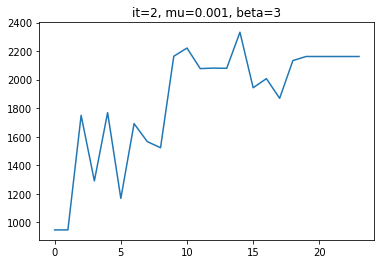

In [17]:
# A second training run on the smote dataset
smote_mlp2 = MLP(T1.shape[1], h, 0.5, np.tanh, mu, beta, repeat=True)
single_T2smote = [ex[1:-1] for ex in T2_smote]
smote_mlp2.train(T1, single_T2smote)
single_run_smote2 = eval_mlp(smote_mlp2, T, T1, T2)
print(single_run_smote2)

In [4]:
# Smote kmeans
T_smotek = T.copy()
T2_smotek = kmeans_SMOTE(T, T2, int(len(T1)/len(T2)) * 100, k=5, n_clusters=int(len(T2) / 30))
for ex in T2_smotek:
    ex.append(-1)
    ex.insert(0, 1) # add arbitrary index valiue
T2_smotek = np.array(T2_smotek)
T_smotek = np.vstack((T_smotek, T2_smotek))

[369.41411892]][[368.6162193]][[369.31136212]][[368.89028642]][[369.63777174]][[369.64496893]][[369.35928363]][[367.69262383]][[368.36669884]][[373.4629409]][[368.53907243]][[368.48373833]][[368.85117787]][[369.50209702]][[369.45076422]][[369.60505833]][[374.07026437]][[373.9603453]][[370.20480375]][[373.86071391]][[418.77846499]][[440.32045139]][[466.08206718]][[549.77908795]][[387.52135485]][[391.61633583]][[493.68033728]][[651.69637838]][[669.89037684]][[658.2928988]][[440.66816649]][[377.87229135]][[387.86260477]][[387.79805633]][[387.91478234]][[387.74816693]][[388.23190654]][[392.53297602]][[387.93765201]][[388.46789767]][[389.82557553]][[390.08568766]][[390.09002868]]Final loss= [[390.09006878]]
Re-optimizing from loss at 368.060
Final loss= [[436.]]6.]]
Re-optimizing from loss at 367.693
Final loss= [[415.20967974]]241]][[1666.06552766]][[1672.75932828]][[379.82364204]][[371.78831337]][[376.39571946]][[372.29799133]][[685.42975074]][[506.36381596]][[605.64709267]][[2703.7135327

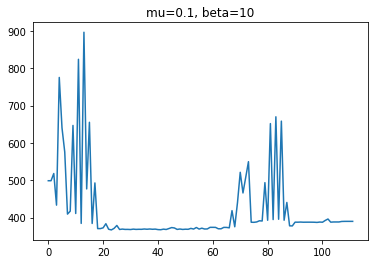

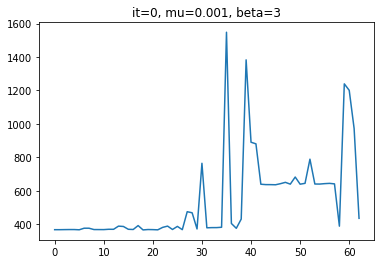

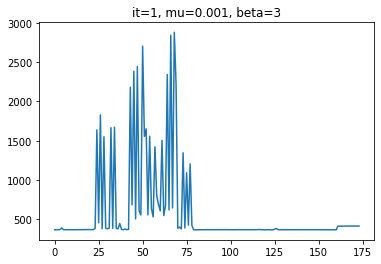

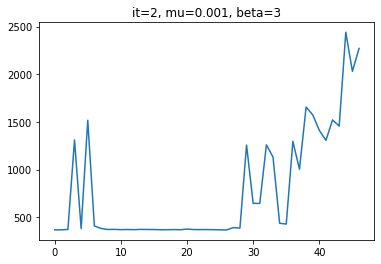

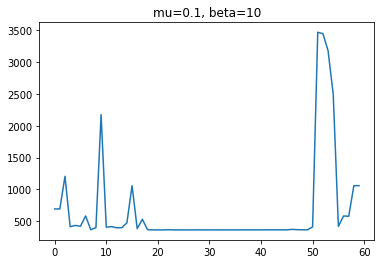

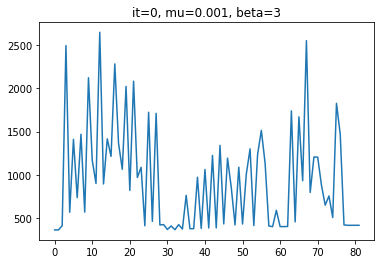

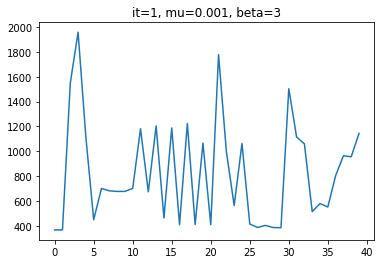

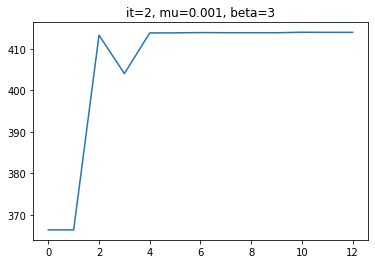

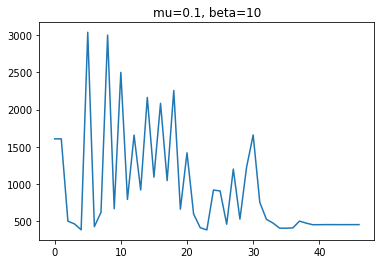

KeyboardInterrupt: 

In [24]:
# K-fold cv on smotek dataset
smotek_mlp = MLP(T1.shape[1], 15, 0.5, np.tanh, mu, beta, repeat=True)
smotek_acc = kfold_cv(smotek_mlp, T_smotek, k=1, test=T)

Final loss= [[2068.00001435]]996]][[2068.00001435]]
Re-optimizing from loss at 1699.839
Final loss= [[2125.99999992]]
Re-optimizing from loss at 1572.188
Final loss= [[2068.59257874]]
Re-optimizing from loss at 1600.734
Final loss= [[1666.41186596]]
[0.7230088495575221, 0.44787644787644787, 0.585442648716985, 0.67170626349892, 0.585442648716985, 0.5690506439000488]


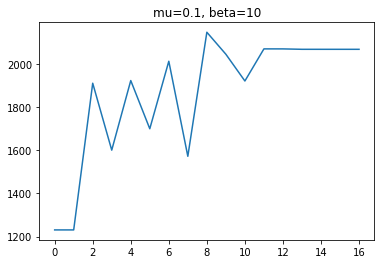

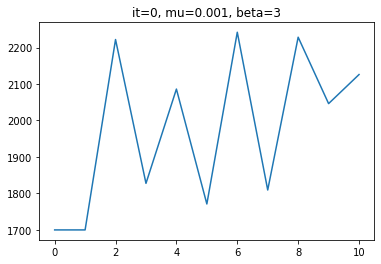

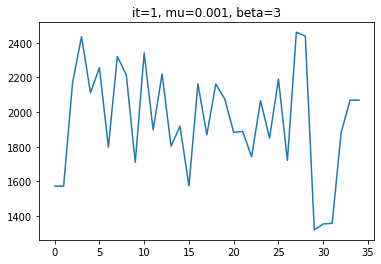

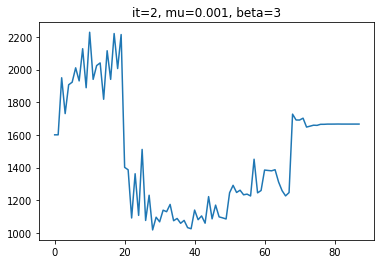

In [23]:
# Single run smote k dataset
single_smotek_mlp = MLP(T1.shape[1], h, 0.5, np.tanh, mu, beta, repeat=True)
single_T2 = [ex[1:-1] for ex in T2_smotek]
single_smotek_mlp.train(T1, single_T2)
single_run_smotek = eval_mlp(single_smotek_mlp, T, T1, T2)
print(single_run_smotek)

Final loss= [[900.36802172]]4389]][[1034.60573466]][[1037.45300828]][[1018.78622512]][[1019.28020757]][[1007.48725174]][[1006.05612972]][[999.47483441]][[994.82376238]][[1012.14279635]][[989.37766308]][[1023.59121854]][[981.49031194]][[1024.6480869]][[972.44862435]][[1014.30257084]][[959.98969751]][[1005.33169718]][[951.57326069]][[998.62568093]][[949.99181082]][[986.18242297]][[937.08588761]][[969.1019667]][[928.13001412]][[961.38686636]][[923.38327849]][[956.53135293]][[915.51750311]][[943.75295072]][[903.00855482]][[929.43088287]][[885.11951343]][[903.52583923]][[883.81369792]][[916.57699174]][[891.92561877]][[925.77836061]][[900.16714528]][[930.70367538]][[899.62314305]][[934.80476298]][[897.134353]][[937.74933935]][[892.77990905]][[942.52382691]][[894.05385028]][[945.15048287]][[892.08224402]][[946.24631256]][[892.1624664]][[950.52088531]][[893.83567852]][[957.06680348]][[895.80610875]][[961.00100683]][[893.48855369]][[962.06487273]][[901.39523197]][[974.55822479]][[901.80471223]]

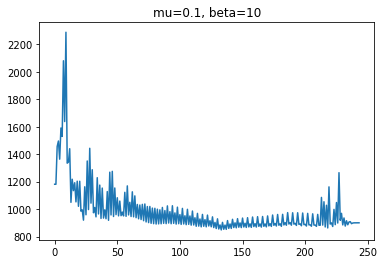

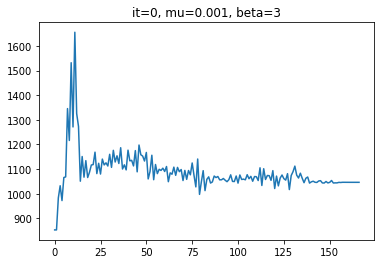

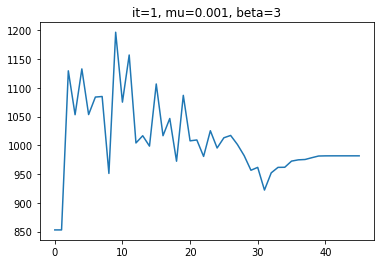

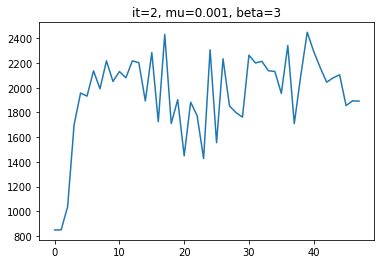

In [11]:
# Second single run
single_smotek_mlp1 = MLP(T1.shape[1], 13, 0.5, np.tanh, mu, beta, repeat=True)
single_smotek_mlp1.train(T1, single_T2)
single_run_smotek = eval_mlp(single_smotek_mlp1, T, T1, T2)
print(single_run_smotek)